In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


from sklearn.linear_model import LinearRegression


In [7]:
def warmup():
    wm=np.identity(5)
    print(wm)    

In [9]:
warmup()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [13]:
data = np.loadtxt('machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

In [16]:
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

(4, 24)

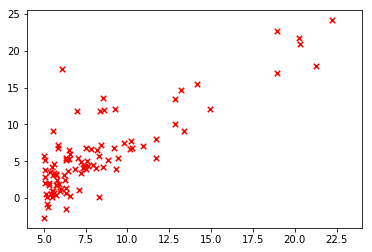

In [29]:
plt.scatter(X[:,1],y,s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)


In [31]:
#CostFunction
def costFunction(X,y,theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = (1/(2*m)) * np.sum(np.square(h-y))
    return (J)
    

In [33]:
costFunction(X,y)

32.072733877455676

In [41]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J2 = np.zeros(num_iters)
    
    for iter in range(0,num_iters):
        h=X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J2[iter] =  costFunction(X, y, theta)
    return(theta, J2)


In [42]:
gradientDescent(X,y)

(array([[-3.63029144],
        [ 1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

theta:  [-3.63029144  1.16636235]


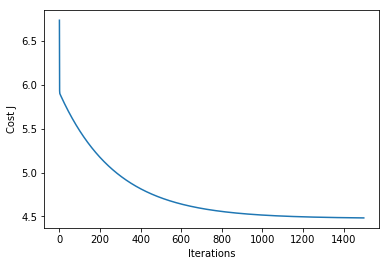

In [44]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

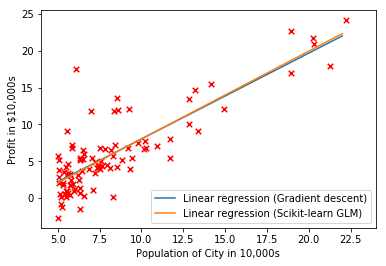

In [47]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

array([1.16636235])